In [35]:
import numpy as np
import os,sys
import shutil
sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
import OpenVisus as ov

os.environ["VISUS_VERBOSE_DISKACCESS"]="0"
os.environ["VISUS_CPP_VERBOSE"]="0"

GB=1024*1024*1024
memsize=1*GB
N=memsize//8
print(f"N={N:,}")

signal = np.random.uniform(low=0.0,high=1.0,size=[N])
print("NUMPY dtype",signal.dtype,"shape",signal.shape,"vmin",np.min(signal),"vmax",np.max(signal1d))

idx_filename='tmp/signal.idx'
shutil.rmtree(os.path.dirname(idx_filename), ignore_errors=True)
db=ov.CreateIdx(url=idx_filename, dims=[N],fields=[Field('data',convert_dtype(signal.dtype),'row_major')], blocksperfile=512, compression="raw")
assert(os.path.isfile(idx_filename))

logic_box=logic_box=ov.BoxNi(ov.PointNi([0]),ov.PointNi([N]))
db.write(signal,  logic_box=logic_box)
print("IDX write uncompressed done","logic_box",logic_box.toString())

db.compressDataset(["zip"]) 
print("compress dataset done")

data=db.read(logic_box=logic_box)
print("IDX read done","dtype",data.dtype,"shape",data.shape,"vmin",np.min(data),"vmax",np.max(data))
assert(list(data.shape)==[N])
assert(np.min(data)==np.min(signal))
assert(np.max(data)==np.max(signal))
assert(data.dtype==signal.dtype)

N=134,217,728
NUMPY dtype float64 shape (134217728,) vmin 1.690497064554819e-08 vmax 0.9995780247520293
IDX write uncompressed done logic_box 0 134217728
compress dataset done
IDX read done dtype float64 shape (134217728,) vmin 1.690497064554819e-08 vmax 0.9999999819631638


logic_box ([0], [134217728])
db.getMaxResolution() 27
IDX read done dtype=float64 shape=(256,) vmin=0.0037248105001298493 vmax=0.9973045980889932


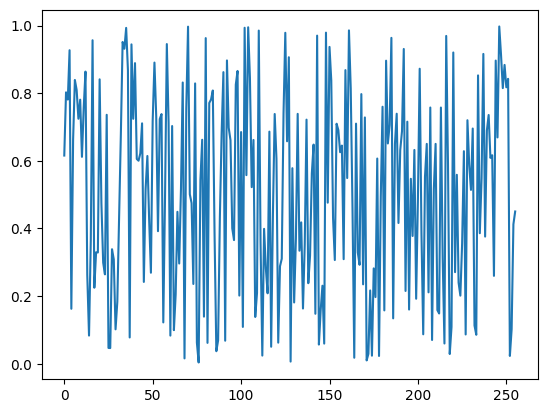

In [46]:
import matplotlib.pyplot as plt

def ShowSignal(data):
    fig, ax = plt.subplots()
    ax.plot(np.arange(data.shape[0]), data)
    my_cmap = plt.get_cmap("viridis")
    plt.show()
    
    
logic_box=db.getLogicBox()
print("logic_box",logic_box)
print("db.getMaxResolution()",db.getMaxResolution())

resolution=8
data=db.read(logic_box=logic_box, max_resolution=resolution)
print(f"IDX read done dtype={data.dtype} shape={data.shape} vmin={np.min(data)} vmax={np.max(data)}")
ShowSignal(data)


In [52]:
import bokeh
import bokeh.plotting
bokeh.io.output_notebook()
fig=bokeh.plotting.figure() 
fig.x_range.start,fig.x_range.end=100.0,200.0
fig.y_range.start,fig.y_range.end=200.0,300.0
fig.line(x=[120,130,140,150], y=[220,230,240,250])
bokeh.io.show(fig,notebook_handle=True)

Loading BokehJS ...